# Buffer Stock Saving 

In a model where impatient consumers face both transitory and permanent shocks _a la_ Friedman (1957), "buffer stock" saving arises: Consumers have a target wealth-to-permanent-income ratio, and actual wealth will be distributed around the target.

[This paper](http://econ.jhu.edu/people/ccarroll/papers/BufferStockTheory/#The-Problem) defines a buffer stock saving model and calibrates parameters:

| Parameter | Description | Code | Value |
| :---: | ---         | ---  | :---: |
| $\newcommand{\PermGroFac}{\Gamma}\PermGroFac$ | Permanent Income Growth Factor | $\texttt{PermGroFac}$ | 1.03 |
| $\newcommand{\Rfree}{\mathrm{\mathsf{R}}}\Rfree$ | Interest Factor | $\texttt{Rfree}$ | 1.04 |
| $\newcommand{\DiscFac}{\beta}\DiscFac$ | Time Preference Factor | $\texttt{DiscFac}$ | 0.96 |
| $\newcommand{\CRRA}{\rho}\CRRA$ | Coeﬃcient of Relative Risk Aversion| $\texttt{CRRA}$ | 2 |
| $\newcommand{\UnempPrb}{\wp}\UnempPrb$ | Probability of Unemployment | $\texttt{UnempPrb}$ | 0.005 |
| $\newcommand{\IncUnemp}{\mu}\IncUnemp$ | Income when Unemployed | $\texttt{IncUnemp}$ | 0. |
| $\newcommand{\PermShkStd}{\sigma_\psi}\PermShkStd$ | Std Dev of Log Permanent Shock| $\texttt{PermShkStd}$ | 0.1 |
| $\newcommand{\TranShkStd}{\sigma_\theta}\TranShkStd$ | Std Dev of Log Transitory Shock| $\texttt{TranShkStd}$ | 0.1 |

For a microeconomic consumer with 'Market Resources' (net worth plus current income) $M_{t}$, end-of-period assets $A_{t}$ will be the amount remaining after consumption of $C_{t}$.  <!-- Next period's 'Balances' $B_{t+1}$ reflect this period's $A_{t}$ augmented by return factor $R$:-->
\begin{eqnarray}
A_{t}   &=&M_{t}-C_{t}  \label{eq:DBCparts} \\
%B_{t+1}   & = & A_{t} R \notag \\
\end{eqnarray}

The consumer's permanent noncapital income $P$ grows by a predictable factor $\PermGroFac$ and is subject to an unpredictable lognormally distributed multiplicative shock $\mathbb{E}_{t}[\psi_{t+1}]=1$, 
\begin{eqnarray}
P_{t+1} & = & P_{t} \PermGroFac \psi_{t+1}
\end{eqnarray}

and actual income is permanent income multiplied by a logormal multiplicative transitory shock, $\mathbb{E}_{t}[\theta_{t+1}]=1$, so that next period's market resources are
\begin{eqnarray}
%M_{t+1} &=& B_{t+1} +P_{t+1}\theta_{t+1},  \notag
M_{t+1} &=& A_{t}R +P_{t+1}\theta_{t+1}.  \notag
\end{eqnarray}

When the consumer has a CRRA utility function $u(c)=\frac{c^{1-\rho}}{1-\rho}$, the paper shows that the problem can be written in terms of ratios of money variables to permanent income, e.g. $m_{t} \equiv M_{t}/P_{t}$, and the Bellman form of [the problem reduces to](http://econ.jhu.edu/people/ccarroll/papers/BufferStockTheory/#The-Related-Problem):

\begin{eqnarray*}
v_t(m_t) &=& \max_{c_t}~~ u(c_t) + \beta~\mathbb{E}_{t} [(\Gamma\psi_{t+1})^{1-\rho} v_{t+1}(m_{t+1}) ] \\
& s.t. & \\
a_t &=& m_t - c_t \\
m_{t+1} &=& R/(\Gamma \psi_{t+1}) a_t + \theta_{t+1} \\
\end{eqnarray*}

and the Euler equation for this model is 

\begin{eqnarray*}
c_{t}^{-\rho} & = & R \beta \mathbb{E}_{t}[(\Gamma \psi c_{t+1})^{-\rho})] \\
0 & = & R \beta \mathbb{E}_{t}[(\Gamma \psi c_{t+1}/c_{t})^{-\rho})]-1
\end{eqnarray*}


For the purposes of this notebook, the paper's baseline parameterization is changed as follows:

1. The unemployment (zero-income event) shocks are turned off
2. An explicit liqudity constraint is added ($c_{t} \leq m_{t}$)

In [3]:
from dolo import *
from matplotlib import pyplot as plt 

In [4]:
model = yaml_import("../models/bufferstock.yaml")

In [5]:
print ( model )


        Model:
        ------
        name: "anonymous"
        type: "dtcc"
        file: "../models/bufferstock.yaml

Equations:
----------

transition
 1  : 1.7554 : m(0) == exp(tran(0)) + ((m(-(1))) - (c(-(1)))) * ((R) / ((Γ) * (exp(perm(0)))))

arbitrage
 1  : -0.8726 : (((R) * (β)) * (((((c(1)) * (exp(perm(0)))) * (Γ)) / (c(0))) ** (-(ρ)))) - (1)

definitions




In [6]:
# Set a maximum range for market resources and solve for the model's decision rule
model.data['calibration']['max_m'] = 10.0
model.data['domain']['m'] = [0,'max_m']

dr = time_iteration(model)

Solving WITH complementarities.
------------------------------------------------
| N   |  Error     | Gain     | Time     | nit |
------------------------------------------------
|   1 |  9.000e-01 |      nan |    0.128 |   5 |
|   2 |  2.860e-02 |    0.032 |    0.106 |   5 |
|   3 |  2.948e-02 |    1.031 |    0.114 |   5 |
|   4 |  3.039e-02 |    1.031 |    0.097 |   5 |
|   5 |  3.132e-02 |    1.031 |    0.108 |   5 |
|   6 |  3.229e-02 |    1.031 |    0.131 |   5 |
|   7 |  3.329e-02 |    1.031 |    0.127 |   5 |
|   8 |  3.431e-02 |    1.031 |    0.151 |   5 |
|   9 |  3.537e-02 |    1.031 |    0.154 |   4 |
|  10 |  3.646e-02 |    1.031 |    0.145 |   4 |
|  11 |  3.758e-02 |    1.031 |    0.300 |   3 |
|  12 |  3.874e-02 |    1.031 |    0.100 |   3 |
|  13 |  3.994e-02 |    1.031 |    0.096 |   3 |
|  14 |  4.117e-02 |    1.031 |    0.140 |   3 |
|  15 |  4.244e-02 |    1.031 |    0.128 |   3 |
|  16 |  4.374e-02 |    1.031 |    0.093 |   2 |
|  17 |  4.509e-02 |    1.031 |    0.

## The Ergodic distribution is roughly centered around the target

In [7]:
sim_long = simulate(model, dr, i0=1, N=1000, T=200)

    
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


Text(0.5, 0, '$m$')

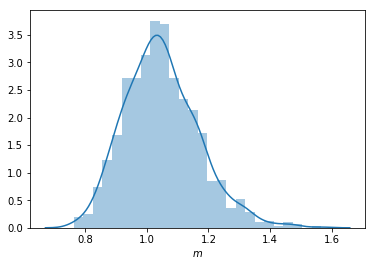

In [8]:
import seaborn
seaborn.distplot(sim_long.sel(T=199, V='m'))
plt.xlabel("$m$")

## Plotting the Decision Rule

In [11]:
tab = tabulate(model, dr,'m')

In [121]:
from matplotlib import pyplot as plt

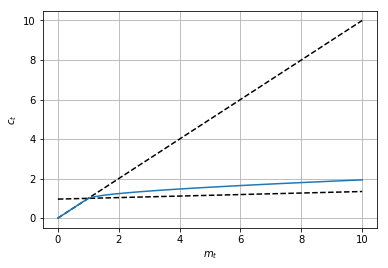

In [14]:
stable_wealth = model.eval_formula('1/R+(1-1/R)*m(0)', tab)
plt.plot(tab['m'], tab['m'],color='black', linestyle='--')
plt.plot(tab['m'], stable_wealth,color='black', linestyle='--')
plt.plot(tab['m'], tab['c'])
plt.xlabel("$m_t$")
plt.ylabel("$c_t$")
plt.grid()